The first function takes up the input of the data frame and the two time series and plots them on a single graph

This allows one to develop an intuition whether cointergation is possible at all

Then we create the scatter plot ; if there emerges an almost linear relationship between the two equity prices , it further hardens our belief that there may exist a cointergation between them

We carry out an Ordinary Least Squares Regression between the two equities and calculate the coefficient of the linear model

Then we calculate the residual values from the fitted linear model of the two price series

We then carry out the ADF test on the calculated residuals and check if the residual time series is a mean-reverting process

This makes our portfolio mean-reverting

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


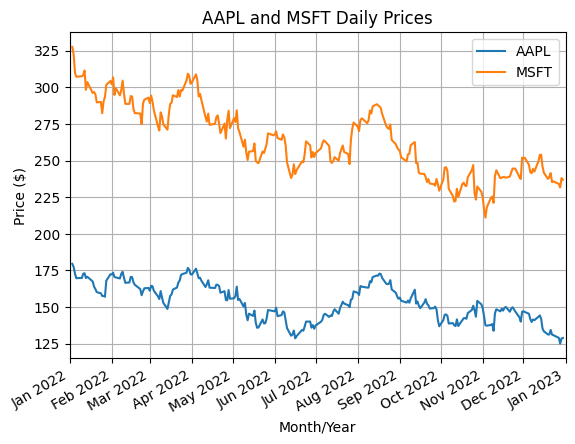

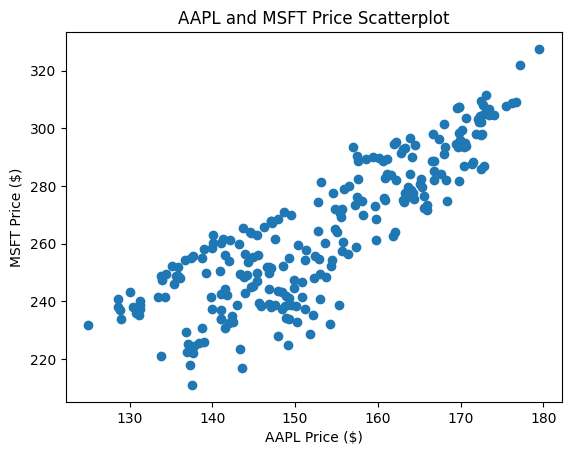

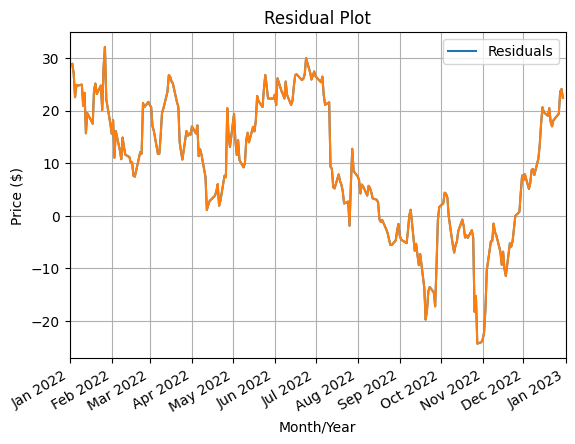

(-1.5684699717216342,
 0.49940995681063033,
 10,
 240,
 {'1%': -3.4578942529658563,
  '10%': -2.573228767361111,
  '5%': -2.8736593200231484},
 1224.9557080072518)
Augmented Dickey-Fuller Test on Residuals
Test Statistic: -1.5684699717216342
P-Value: 0.49940995681063033
Number of Lags: 10
Number of Observations Used: 240
Critical Values:
   1%: -3.4578942529658563
   5%: -2.8736593200231484
   10%: -2.573228767361111
IC Best: 1224.9557080072518


In [12]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import yfinance as yf
import pprint
import statsmodels.tsa.stattools as ts
import statsmodels.api as sm


def plot_price_series(df, ts1, ts2):
    months = mdates.MonthLocator()
    fig, ax = plt.subplots()
    ax.plot(df.index, df[ts1], label=ts1)
    ax.plot(df.index, df[ts2], label=ts2)
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.set_xlim(datetime.datetime(2022, 1, 1), datetime.datetime(2023, 1, 1))
    ax.grid(True)
    fig.autofmt_xdate()

    plt.xlabel('Month/Year')
    plt.ylabel('Price ($)')
    plt.title('%s and %s Daily Prices' % (ts1, ts2))
    plt.legend()
    plt.show()

def plot_scatter_series(df, ts1, ts2):
    plt.xlabel('%s Price ($)' % ts1)
    plt.ylabel('%s Price ($)' % ts2)
    plt.title('%s and %s Price Scatterplot' % (ts1, ts2))
    plt.scatter(df[ts1], df[ts2])
    plt.show()

def plot_residuals(df):
    months = mdates.MonthLocator()  # every month
    fig, ax = plt.subplots()
    ax.plot(df.index, df["res"], label="Residuals")
    ax.xaxis.set_major_locator(months)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.set_xlim(datetime.datetime(2022, 1, 1), datetime.datetime(2023, 1, 1))
    ax.grid(True)
    fig.autofmt_xdate()

    plt.xlabel('Month/Year')
    plt.ylabel('Price ($)')
    plt.title('Residual Plot')
    plt.legend()

    plt.plot(df["res"])
    plt.show()

if __name__ == "__main__":
    start = datetime.datetime(2022, 1, 1)
    end = datetime.datetime(2023, 1, 1)

    ticker1 = "AAPL"
    ticker2 = "MSFT"

    data1 = yf.download(ticker1, start=start, end=end)
    data2 = yf.download(ticker2, start=start, end=end)

    if data1.empty or data2.empty:
        print("Error: Failed to download data. Check if ticker symbols are valid.")
    else:
        df = pd.DataFrame(index=data1.index)
        df[ticker1] = data1["Adj Close"]
        df[ticker2] = data2["Adj Close"]

        plot_price_series(df, ticker1, ticker2)

        plot_scatter_series(df, ticker1, ticker2)

        # Calculate optimal hedge ratio "beta"
        X = df[[ticker1]]
        res = sm.OLS(endog=df[ticker2], exog=sm.add_constant(X)).fit()
        beta_hr = res.params[ticker1]

        df["res"] = df[ticker2] - beta_hr * df[ticker1]

        plot_residuals(df)

        cadf = ts.adfuller(df["res"])
        pprint.pprint(cadf)

        print("Augmented Dickey-Fuller Test on Residuals")
        print(f"Test Statistic: {cadf[0]}")
        print(f"P-Value: {cadf[1]}")
        print(f"Number of Lags: {cadf[2]}")
        print(f"Number of Observations Used: {cadf[3]}")
        print("Critical Values:")
        for key, value in cadf[4].items():
            print(f"   {key}: {value}")
        print(f"IC Best: {cadf[5]}")


# Results

As it is apparent, the value of test statistic is greater than all critical values; we can therefore reject the null hypothesis and the two stocks have a cointegrating relationship , at least for the time period sample considered